# Best neighborhood in the City of Pittsburgh
In this project our group analyzed three different data sets to find a subjective "best" neighborhood in Pittsburgh. The metrics we looked at were number of steps, obesity rates, and average property value. Collecting and aggregating this data included many techniques such as dataframe manipulation. Also research into the municipality definitions of Pittsburgh were needed to form coherent conclusions across three different datasets.

## Defining neighborhood by city municipality
The used datasets had neighborhoods broken down into named areas, as well as the city defined zones. 

Below is a map of the zones.

In [1]:
from IPython.display import HTML
HTML('<iframe src=https://pittsburghpa.maps.arcgis.com/apps/OnePane/basicviewer/index.html?appid=2a57c4fbe92248e38a57220d20f23ae2 width=900 height=700></iframe>')

/opt/tljh/user/lib/python3.8/site-packages/IPython/core/display.py:717: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


In [2]:
import pandas as pd
import numpy as np
import math as math
%matplotlib notebook
import matplotlib.pyplot as plt

# Metric 1: Number of steps
Subjectivley we chose the area with the least amount of steps to be the "best" as it requires minimal physical activity.

In [3]:
steps_data = pd.read_csv("https://data.wprdc.org/datastore/dump/43f40ca4-2211-4a12-8b4f-4d052662bb64")
steps_data.head(5)

,id,name,maintenance_responsibility,installed,material,length,number_of_steps,schools_count,school_score,total_population,...,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,326501686,10 Wakefield St,3rd Division,NaN,Concrete,53.0,8.0,0.0,100.0,367.0,...,South Oakland,3.0,4,42003040900,3,4,4,2-11,40.430926,-79.957090
1,527853474,1005 St Martin St,4th Division,NaN,Concrete,33.0,24.0,NaN,NaN,NaN,...,South Side Slopes,3.0,17,42003170600,3,17,3,4-6,40.422410,-79.988215
2,1074700399,1017 St Martin St,4th Division,NaN,Concrete,52.0,4.0,NaN,NaN,NaN,...,South Side Slopes,3.0,17,42003170600,3,17,3,4-6,40.422471,-79.987604
3,50987987,30th St from Bigelow Blvd to Leander St,3rd Division,1948-01-01,Concrete,106.0,106.0,0.0,100.0,235.0,...,Bedford Dwellings,7.0,6,42003060500,3,6,2,2-24,40.454787,-79.968453
4,173445306,30th St from Paulowna to Bigelow Blvd,6th Division,1948-01-01,Concrete,204.0,85.0,1.0,4.0,422.0,...,Polish Hill,7.0,6,42003060500,6,6,2,2-6,40.455470,-79.968725


In [4]:
neigh = steps_data['neighborhood'].unique()
print(neigh)

In [5]:
s = []
n = []
z = []
#fills array of steps 
for i in range(1010):
    s.append(steps_data.loc[i,'number_of_steps'])
#print(s)
s=s[-1010:]
#fills array of neighborhoods
for j in range(1010):
    n.append(steps_data.loc[j,'neighborhood'])
#print(n)
n=n[-1010:]

for i in range (1010):
    if str(s[i]).lower() == 'nan':
        s[i] = 0
    s[i] = int(s[i])
#fills array of pairs 
for i in range (1010):
    z.append([n[i],s[i]])
    
z=z[2:-1]
z.sort(key=lambda x:x[1]) 

#print(z)

In [6]:
#Adds all Steps in each neighborhood
stepsum = 0
finalList = []
for x in (neigh):
    for i in (z):
        if i[0] == x:
            stepsum += i[1]
    finalList.append([x,stepsum]) 
    stepsum = 0
finalList.sort(key=lambda x:x[1])
print(finalList)

In [7]:
# Seperating Matched Data by Index of Each Element
sortedSteps = []
for x in (finalList):
    sortedSteps.append(x[1])
print(sortedSteps)
sortedNeigh = []
for x in (finalList):
    sortedNeigh.append(x[0])
print(sortedNeigh)

In [8]:
#Inserting Matched Data Into Data Frame
steps_data['Total_Steps'] = pd.Series(sortedSteps)
steps_data['Neighborhoods_In_Order'] = pd.Series(sortedNeigh)


#Taking Desired Columns and Creating New DataFrame
selected_columns = steps_data[['Neighborhoods_In_Order','Total_Steps']]
new_df = selected_columns.copy()


#Graph
plotData = new_df.dropna()
plotData.plot(x = 'Neighborhoods_In_Order', y = 'Total_Steps', kind = 'bar')
plt.rcParams["figure.figsize"] = (50,20)
plt.rc('xtick', labelsize=30)
plt.rc('ytick', labelsize=30)
plt.title('Pittsburgh Neighborhoods and Steps', size = 30)
plt.xlabel('Neighborhoods', size = 30)
plt.ylabel('# of Steps', size = 30)

plt.show()

<IPython.core.display.Javascript object>

## Metric 1 conclusion

In this metric, while Oakland is not leading in the metric of least steps, it has a significantly lower count of steps than many other neighborhoods, making it a contender for the future.

# Metric 2: Obesity Rates
Subjectivley we chose the area with the lowest obesity rates to be the "best" as it is in theory the healthiest.

In [9]:
ob = pd.read_csv("https://data.wprdc.org/dataset/b049da40-910a-4b9d-9438-ff584e432bb1/resource/fce248f0-8697-4d2a-bbe0-2da826776bfa/download/obesity-ac-2006-2010censustracts.csv", )
## replace spaces with underscores to improve compataibilty
ob.columns = [c.replace(' ', '_') for c in ob.columns]

In [10]:
## remove duplicate neighborhoods
neigh = ob['City_Neighborhood'].unique()
print(neigh)

['Bluff' 'Central Business District' 'Strip District' 'Crawford Roberts'
 'West oakland' 'North oakland' 'Central Oakland' 'South Oakland'
 'Middle Hill' 'Upper Hill' 'Bedford Dwellings' 'Terrace Village'
 'Lower Lawrenceville' 'Polish Hill' 'Shadyside' 'Bloomfield' 'Friendship'
 'Central Lawrenceville' 'Stanton Heights' 'Upper Lawrenceville'
 'Morningside' 'Garfield' 'Highland Park' 'East Liberty' 'Larimer'
 'Homewood West' 'Homewood North' 'Homewood South' 'East Hills'
 'Squirrel Hill North' 'Point Breeze' 'Point Breeze North'
 'Squirrel Hill South' 'Regent Square' 'Swisshelm Park' 'Hazelwood'
 'Greenfield' 'Southside Slopes' 'Southside Flats' 'Allentown'
 'Mount Washington' 'Duquesne Heights' 'Beechview' 'Brookline' 'Sheraden'
 'Banksville' 'Manchester' 'Central Northside' "Troy Hill/Herr's Island"
 'Spring Garden' 'California Kirkbride' 'Fineview' 'Perry North'
 'Northview Heights' 'Summer Hill' 'Perry South' 'Spring Hill-Cityview'
 'Brighton Heights' 'Marshall-Shadeland' 'Crafton 

In [11]:
## remove neighborhood not in pittsburgh
ob = ob.sort_values(by=['2006-2010_estimate_of_obesity']).dropna()
## convert to percentage
ob.loc[:, '2006-2010_estimate_of_obesity'] = ob['2006-2010_estimate_of_obesity'] * 100
ob

,stname,tractfips,2000_Tract,2010_Tract,MUNICIPALITY,Municipality,City_Neighborhood,2006-2010_estimate_of_obesity
369,Pennsylvania,42003562000,40300,562000 & 982200,PITTSBURGH,Pittsburgh,North Oakland,7.035281
413,Pennsylvania,42003981200,220500,563200 & 981200,PITTSBURGH,Pittsburgh,North Shore,12.148674
415,Pennsylvania,42003982200,50700,562000 & 982200,PITTSBURGH,Pittsburgh,North Oakland,13.880555
378,Pennsylvania,42003562700,220100,562700,PITTSBURGH,Pittsburgh,Allegheny West,20.639897
387,Pennsylvania,42003563100,281100,563100,PITTSBURGH,Pittsburgh,Westwood,26.810591
381,Pennsylvania,42003562800,281200,562800,PITTSBURGH,Pittsburgh,Oakwood,26.857921
386,Pennsylvania,42003563100,201600,563100,PITTSBURGH,Pittsburgh,Ridgemont,27.678553
376,Pennsylvania,42003562600,201900,562600,PITTSBURGH,Pittsburgh,West End,28.790369
372,Pennsylvania,42003562400,180600,562400,PITTSBURGH,Pittsburgh,Bon Air,28.950467
382,Pennsylvania,42003562900,310100,562900,PITTSBURGH,Pittsburgh,Hays,30.653910


Text(0, 0.5, 'Percentage of Obese People')

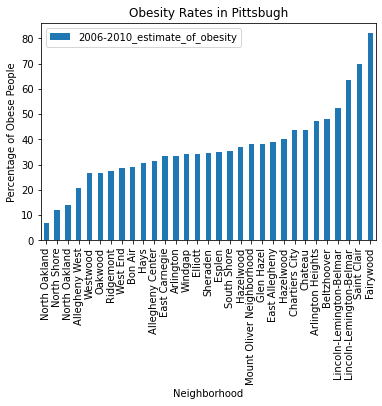

In [12]:
## graph data
%matplotlib inline
import matplotlib.pyplot as plt
ob.plot(x = 'City_Neighborhood', y = '2006-2010_estimate_of_obesity', kind = 'bar')
plt.title("Obesity Rates in Pittsbugh")
plt.xlabel("Neighborhood")
plt.ylabel("Percentage of Obese People")

## Metric 2 conclusion

In this metric, Oakland is found to be the neighborhood with the lowest obesity rate from 2006-2010

# Metric 3: Property value
Subjectivley we chose the area with the highest property value as it its theoreticaly the wealthiest.

In [13]:
WARDS = {"1st Ward  - PITTSBURGH" : "Downtown/Bluff/Duquesne University",
 "2nd Ward - PITTSBURGH" : "Downtown/Part of Lower Hill District/Strip District",
 "3rd Ward - PITTSBURGH" : "Lower Hill District",
 "4th Ward - PITTSBURGH" : "Oakland/Soho",
 "5th Ward - PITTSBURGH" : "Upper Hill District",
 "6th Ward - PITTSBURGH" : "Strip District/Polish Hill",
 "7th Ward - PITTSBURGH" : "Shadyside",
 "8th Ward - PITTSBURGH" : "Bloomfield",
 "9th Ward - PITTSBURGH" : "Lawrenceville",
 "10th Ward - PITTSBURGH" : "Morningside/Garfield",
 "11th Ward - PITTSBURGH" : "East End/Mall Area/Highland Park",
 "12th Ward - PITTSBURGH" : "East Liberty",
 "13th Ward - PITTSBURGH" : "Homewood",
 "14th Ward - PITTSBURGH" : "Squirrel Hill/Point Breeze/Frick Park",
 "15th Ward - PITTSBURGH" : "Hazelwood/Greenfield",
 "16th Ward - PITTSBURGH" : "South Side/21st Street/Mountain Street/Arlington Heights",
 "17th Ward - PITTSBURGH" : "South Side/21st Street/St. Paul’s Monastery/St. Michael’s",
 "18th Ward - PITTSBURGH" : "Allentown/Beltzhoover",
 "19th Ward - PITTSBURGH" : "Brookline/Mt. Washingon/Beechview",
 "20th Ward - PITTSBURGH" : "West End/Corliss",
 "21st Ward - PITTSBURGH" : "Manchester",
 "22nd Ward - PITTSBURGH" : "Stadium/Allegheny Center/North Side Proper",
 "23rd Ward - PITTSBURGH" : "Latimer Jr. High School/HJ Heinz Co. Area",
 "24th Ward - PITTSBURGH" : "Troy Hill/Spring Garden",
 "25th Ward - PITTSBURGH" : "Pineview/Federal Street Ext.",
 "26th Ward - PITTSBURGH" : "Perrysville/Riverview",
 "27th Ward - PITTSBURGH" : "Woods Run/Brighton Rd.",
 "28th Ward - PITTSBURGH" : "Chartiers/Crafton Heights/Westwood/Esplen",
 "29th Ward - PITTSBURGH" : "Carrick",
 "30th Ward - PITTSBURGH" : "Knoxville",
 "31st Ward - PITTSBURGH" : "Hays/Lincoln Place",
 "32nd Ward - PITTSBURGH" : "Overbrook"}

In [14]:
#Allegheny County Property Assessments: https://data.wprdc.org/dataset/property-assessments

#Allegheny County   Property Assessments Parcel Data   321MB
#https://data.wprdc.org/datastore/dump/518b583f-7cc8-4f60-94d0-174cc98310dc
data_raw_value = pd.read_csv("https://data.wprdc.org/datastore/dump/518b583f-7cc8-4f60-94d0-174cc98310dc")

#Allegheny County   OCT-2020 Property Assessments Parcel Data   410MB
#https://data.wprdc.org/dataset/2b3df818-601e-4f06-b150-643557229491/resource/f2b8d575-e256-4718-94ad-1e12239ddb92/download/assessments.csv
data_raw_nID = pd.read_csv("https://data.wprdc.org/dataset/2b3df818-601e-4f06-b150-643557229491/resource/f2b8d575-e256-4718-94ad-1e12239ddb92/download/assessments.csv")

/opt/tljh/user/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (19,20,29,30,31,38,46,57,83) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [15]:
#Create column filters
TO_KEEP_V = ["PARID", "SALEPRICE", "MUNIDESC"]
EXISTING_V = list(data_raw_value.columns.values)
TO_REMOVE_V = [v for v in EXISTING_V if v not in TO_KEEP_V]

TO_KEEP_nID = ["PARID", "NEIGHCODE"]
EXISTING_nID = list(data_raw_nID.columns.values)
TO_REMOVE_nID = [v for v in EXISTING_nID if v not in TO_KEEP_nID]

In [16]:
#Preproccessing
data_pre_value = data_raw_value
data_pre_nID = data_raw_nID

#Filter datasets to only specified columns
data_pre_value = data_pre_value.drop(axis = 1, labels = TO_REMOVE_V)
data_pre_nID = data_pre_nID.drop(axis = 1, labels = TO_REMOVE_nID)

#Merge both datasets based on parcel ID
data_raw = pd.merge(data_pre_value, data_pre_nID, on='PARID').dropna()

#Filter dataset from all regions in Allegheny County to just those of The City of Pittsburgh
data_raw = data_raw[data_raw["MUNIDESC"].isin(list(WARDS.keys()))]

#Change name in dataset from working name of numerical wards to commonplace names
data_raw = data_raw.replace({"MUNIDESC": WARDS})

#Filter out low cost sales, often indicative of passing wills.
data_raw = data_raw[data_raw['SALEPRICE'] > 500]

data_raw.head(5)

,PARID,MUNIDESC,SALEPRICE,NEIGHCODE
2,0001G00107000000,Downtown/Bluff/Duquesne University,344250.0,51C02
3,0001G00109000000,Downtown/Bluff/Duquesne University,344250.0,51C02
4,0001G00111000000,Downtown/Bluff/Duquesne University,2000000.0,51C01
5,0001G00112000000,Downtown/Bluff/Duquesne University,1796575.0,51C01
6,0001G00113000000,Downtown/Bluff/Duquesne University,1729700.0,51C01


In [17]:
#Sum the sale price of each municipality 
muni_sums = data_raw.groupby('MUNIDESC')['SALEPRICE'].sum().to_dict()

#Count the number of sales in each municipality
muni_count = data_raw.groupby(by="MUNIDESC").count().drop(axis=1, labels=["SALEPRICE", "NEIGHCODE"]).to_dict()["PARID"]

In [18]:
#Create dictionary of average sale price of each municipality
avg_sale_val = {}
neighborhoods = list(WARDS.values())
for i in range(0, len(WARDS)):
    location = neighborhoods[i]
    avg_sale_val[location] = muni_sums[location] / muni_count[location]

In [19]:
#Create new dictionary to input into new dataframe
data_dict = {
    "Neighborhood" : list(avg_sale_val.keys()),
    "Average sale price" : list(avg_sale_val.values())
}

data = pd.DataFrame.from_dict(data_dict, orient='index').T
data

,Neighborhood,Average sale price
0,Downtown/Bluff/Duquesne University,1.36327e+06
1,Downtown/Part of Lower Hill District/Strip Dis...,1.631e+06
2,Lower Hill District,379449
3,Oakland/Soho,657061
4,Upper Hill District,121589
5,Strip District/Polish Hill,376622
6,Shadyside,405113
7,Bloomfield,267398
8,Lawrenceville,235249
9,Morningside/Garfield,118865


### NOTE: Numerical values are indexes. Add one for actual ward number.

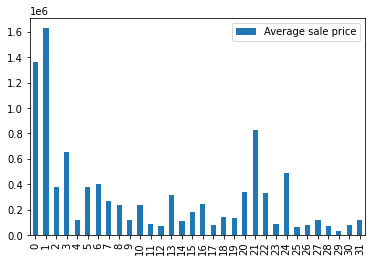

In [20]:
#Display data as bargraph of average property sale price in each municipality
data.plot(kind="bar")

In [21]:
from IPython.display import HTML
HTML('<iframe src=https://pittsburghpa.maps.arcgis.com/apps/OnePane/basicviewer/index.html?appid=2a57c4fbe92248e38a57220d20f23ae2 width=700 height=500></iframe>')

/opt/tljh/user/lib/python3.8/site-packages/IPython/core/display.py:717: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


## Metric 3 conclusion
In this metric, Oakland is also found to be one of the top valued regions in terms of property sales when selecting for resedential areas.

# Conclusion
When looking at all three metrics, number of stairs, obesity rates, and property value, Oakland consistently shows up in the top few neighborhoods, often being first, with respect to each of these metrics, thus cementing it as the best neighborhood in Pittsburgh.